In [43]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import torch
import re
import pandas as pd
import pytz
import argparse

from datetime import datetime
from matplotlib import pyplot as plt
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
def get_time_stamp(timezone: str = "US/Eastern") -> str:
    """Get current string-like timestamp."""
    utc_now = pytz.utc.localize(datetime.utcnow())
    tz = pytz.timezone(timezone)
    utc_as_tz = utc_now.astimezone(tz)
    return f"{utc_as_tz.strftime('%m%d%y-%H%M%S')}"


def df_from_path(from_path):
    df = pd.read_pickle(from_path)
    df = df.set_index("index")

    rx = re.compile(r"/(\d+)/")
    for name, row in df.iterrows():
        island_id = rx.findall(name)[0]
        df.at[name, 'island_id'] = int(island_id)
        if 'mainland' in name:
            df.at[name, 'island_type'] = "mainland"
        else:
            df.at[name, 'island_type'] = "island"

    df = df.astype({
        'island_id': int,
        'epoch': int
    })
    return df

In [45]:
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/080324-011046/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/080524-230617/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/080724-182228/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/080924-184159/1000/")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/080924-190624/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/080924-205738/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/081324-204612/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/081324-204612/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/081324-222114/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/081424-160047/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/081424-191155/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/081524-191219/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/081524-222145/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/081724-164814/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/081924-223857/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/082224-230448/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/082624-204000/1000")
# root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/082624-230305/1000")
root_folder = Path("/data/petabyte/wgarcia/save/mo-marl/autogen/082724-150941/1000")
out_root = Path("/data/petabyte/wgarcia/save/mo-marl/byproduct")

In [46]:
ts = root_folder.parts[-2]
figures_dir = out_root / ts / "figures"
if not figures_dir.exists():
    figures_dir.mkdir(parents=True)

run_ids = root_folder.glob("*")

In [47]:
import yaml
from collections import defaultdict

dfs = []

def should_keep(state: dict) -> bool:
    if state['epochs'] > 1:
        return False

    if state['mainland_iterations'] > 1:
        return False

    return True

# load one run to cache cols and rows
for ix, run_id in enumerate(run_ids):
    extras_config_path = run_id / "search_data_out" / "extras_config.yml"
    with open(extras_config_path, 'r') as f:
        extras_config = yaml.safe_load(f)

    # if not should_keep(extras_config):
    #     continue

    from_path = run_id / "search_data_out" / "df.pkl"
    df = df_from_path(from_path)
    for k, v in extras_config.items():
        df[k] = [v] * len(df)

    dfs.append(df)


ldf = pd.concat(dfs)

In [48]:
ldf

,add_migrants_to_buffer,evolve/info/team/0/agent/agent_0/closest_ally_distance,evolve/info/team/0/agent/agent_0/training/grad_norm,evolve/info/team/0/agent/agent_0/training/vf_explained_var,evolve/info/team/0/agent/agent_0/training/entropy_coeff,evolve/info/team/0/closest_ally_distance,evolve/info/team/0/agent/adversary_1/rollout/returns,evolve/info/team/0/tag_score,evolve/info/team/0/agent/agent_0/boundary_penalty,evolve/info/team/0/agent/agent_0/closest_adversary_distance,...,island_iterations,mainland_iterations,num_sgd_iters,run_id,save_root,seed,sgd_minibatch_size,sigma,tag,uda_training_iterations
index,,,,,,,,,,,,,,,,,,,,,
island/0/epoch0,{'update_archives': {'train_encoder': {'encode...,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[[261.53223, 261.53223, 261.53223, 261.53223, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[6.5, 9.25, 5.75, 8.0, 6.0, 3.5, 5.5, 6.5, 3....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-52.6285400390625, -60.760826110839844, -80.3...","[22.87624740600586, 25.189876556396484, 26.188...",...,10,1,100,2,/data/petabyte/wgarcia/save/mo-marl/autogen/08...,1000,1000,0.1,,20
island/0/epoch0,{'update_archives': {'train_encoder': {'encode...,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[[286.7324, 261.36447, 262.05038, 261.371, 262...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[8.0, 4.5, 6.5, 8.25, 6.25, 5.5, 3.0, 8.0, 9....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-73.48484802246094, -102.96926879882812, -54....","[24.641164779663086, 29.894874572753906, 21.14...",...,10,1,100,2,/data/petabyte/wgarcia/save/mo-marl/autogen/08...,1000,1000,0.1,,20
island/0/epoch0,{'update_archives': {'train_encoder': {'encode...,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[[264.54282, 262.34546, 262.48276, 264.4151, 2...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[8.25, 12.5, 8.5, 10.25, 5.75, 5.25, 9.25, 8....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-117.93112182617188, -92.4421615600586, -62.5...","[35.92350769042969, 22.043670654296875, 20.819...",...,10,1,100,2,/data/petabyte/wgarcia/save/mo-marl/autogen/08...,1000,1000,0.1,,20
island/0/epoch0,{'update_archives': {'train_encoder': {'encode...,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[[261.53223, 261.53223, 261.53223, 261.53223, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[8.0625, 9.0, 6.375, 8.6875, 7.125, 6.875, 5....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-75.82655334472656, -95.03762817382812, -92.2...","[27.837434768676758, 31.169206619262695, 30.43...",...,10,1,100,3,/data/petabyte/wgarcia/save/mo-marl/autogen/08...,1000,1000,0.1,,20
island/0/epoch0,{'update_archives': {'train_encoder': {'encode...,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[[287.37857, 262.18564, 262.51196, 263.28247, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[6.0, 6.25, 6.5, 6.5, 7.625, 8.8125, 6.5625, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-121.03199005126953, -120.75956726074219, -51...","[20.435226440429688, 26.63503646850586, 22.055...",...,10,1,100,3,/data/petabyte/wgarcia/save/mo-marl/autogen/08...,1000,1000,0.1,,20
island/0/epoch0,{'update_archives': {'train_encoder': {'encode...,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....","[[263.08975, 262.85928, 262.47723, 265.27838, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.

In [49]:
for key in list(extras_config.keys()):
    if key in ["run_id", "save_root"]:
        continue
    
    print(f"param: {key}, # variations: {len(ldf[key].unique())}")
    print(ldf[key].unique())

param: archipelago_training_iterations, # variations: 1
[0]
param: batch_size, # variations: 2
[1000 4000]
param: epochs, # variations: 1
[3]
param: island_iterations, # variations: 2
[10  5]
param: mainland_iterations, # variations: 1
[1]
param: num_sgd_iters, # variations: 1
[100]
param: seed, # variations: 1
[1000]
param: sgd_minibatch_size, # variations: 1
[1000]
param: sigma, # variations: 1
[0.1]
param: tag, # variations: 1
['']
param: uda_training_iterations, # variations: 1
[20]


		island_iterations: 5
		uda_training_iterations: 20
	
um_sgd_iters: 100
	fitness
tf keys: ['evolve/fitness/team/0']


	total_loss
tf keys: ['evolve/info/team/0/agent/agent_0/training/total_loss']
	return
tf keys: ['evolve/info/team/0/agent/adversary_1/rollout/returns', 'evolve/info/team/0/agent/adversary_0/rollout/returns', 'evolve/info/team/0/agent/agent_0/rollout/returns', 'evolve/info/team/0/agent/adversary_2/rollout/returns']
	evolve/info/team/0/agent/agent_0/tag_score
tf keys: ['evolve/info/team/0/agent/agent_0/tag_score']
		island_iterations: 10
		uda_training_iterations: 20
	
um_sgd_iters: 100
	fitness
tf keys: ['evolve/fitness/team/0']
	total_loss
tf keys: ['evolve/info/team/0/agent/agent_0/training/total_loss']
	return
tf keys: ['evolve/info/team/0/agent/adversary_1/rollout/returns', 'evolve/info/team/0/agent/adversary_0/rollout/returns', 'evolve/info/team/0/agent/agent_0/rollout/returns', 'evolve/info/team/0/agent/adversary_2/rollout/returns']
	evolve/info/team/0/agent/agent_0/tag_score
tf keys: ['evolve/info/team/0/agent/agent_0/tag_score']


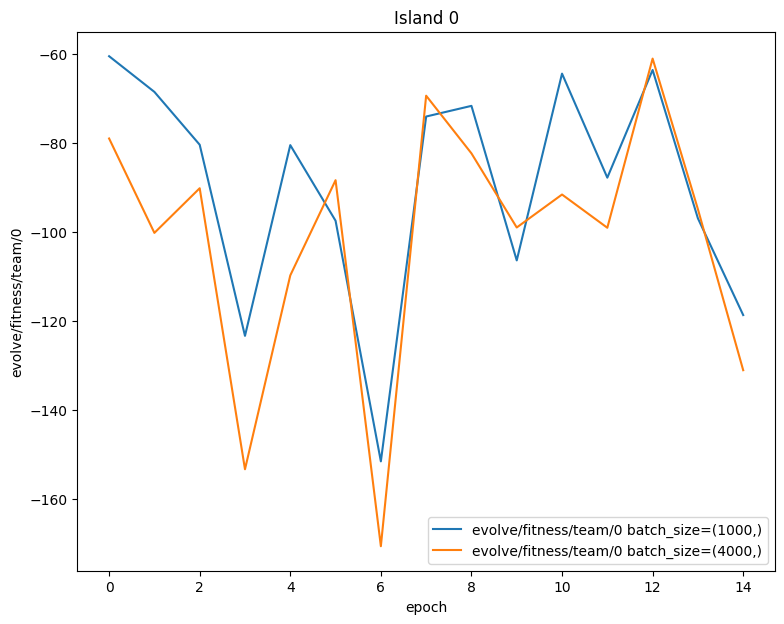

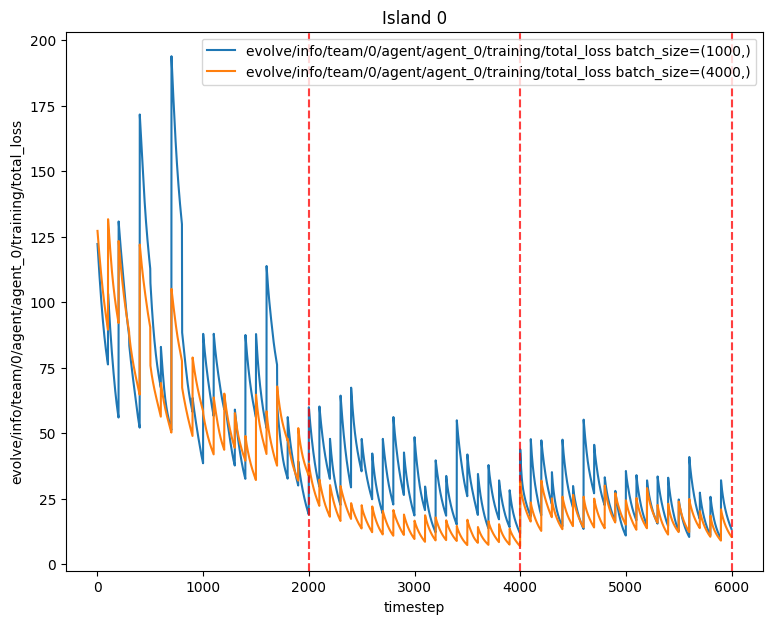

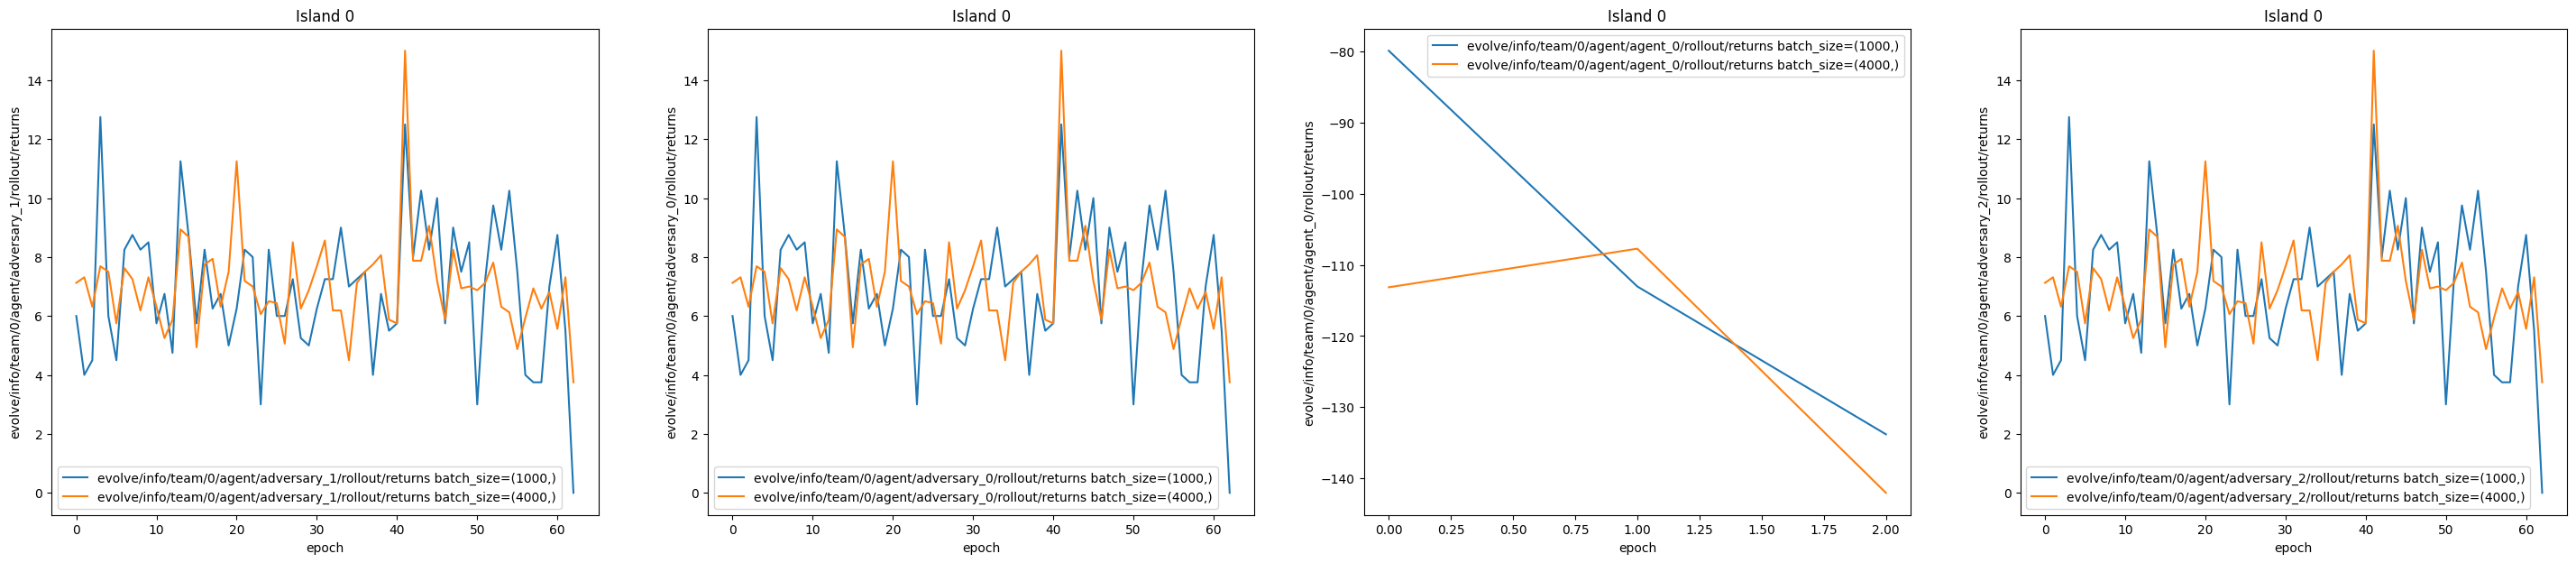

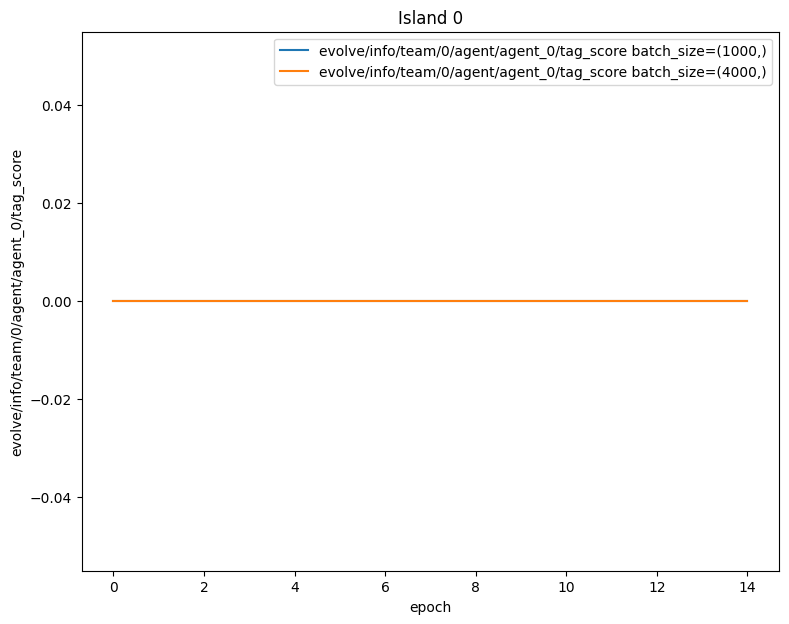

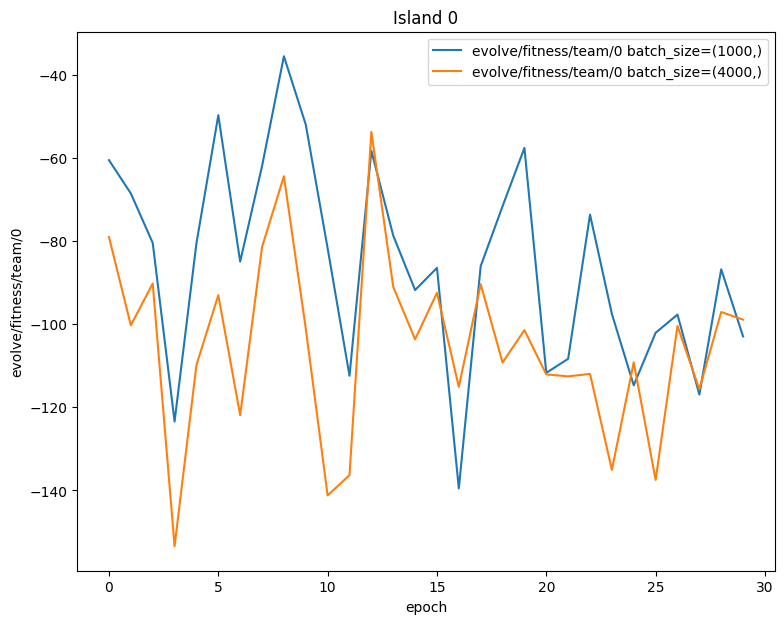

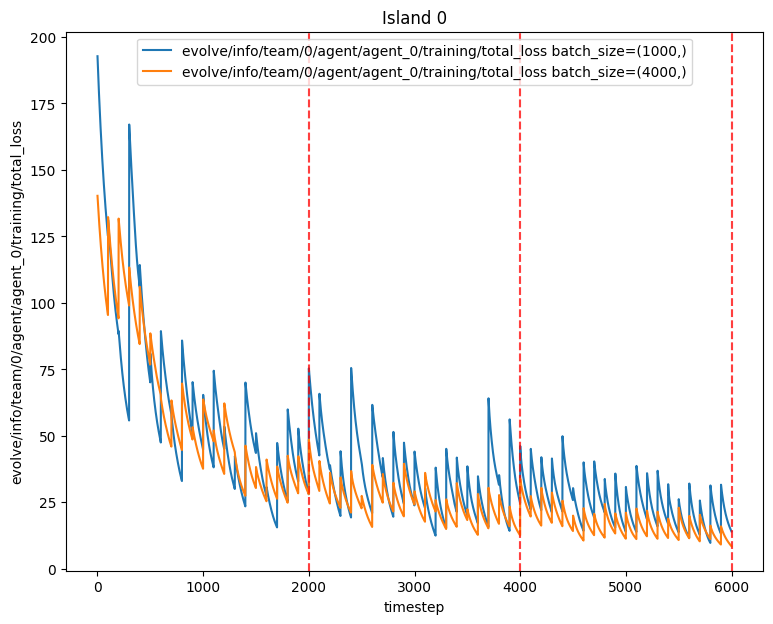

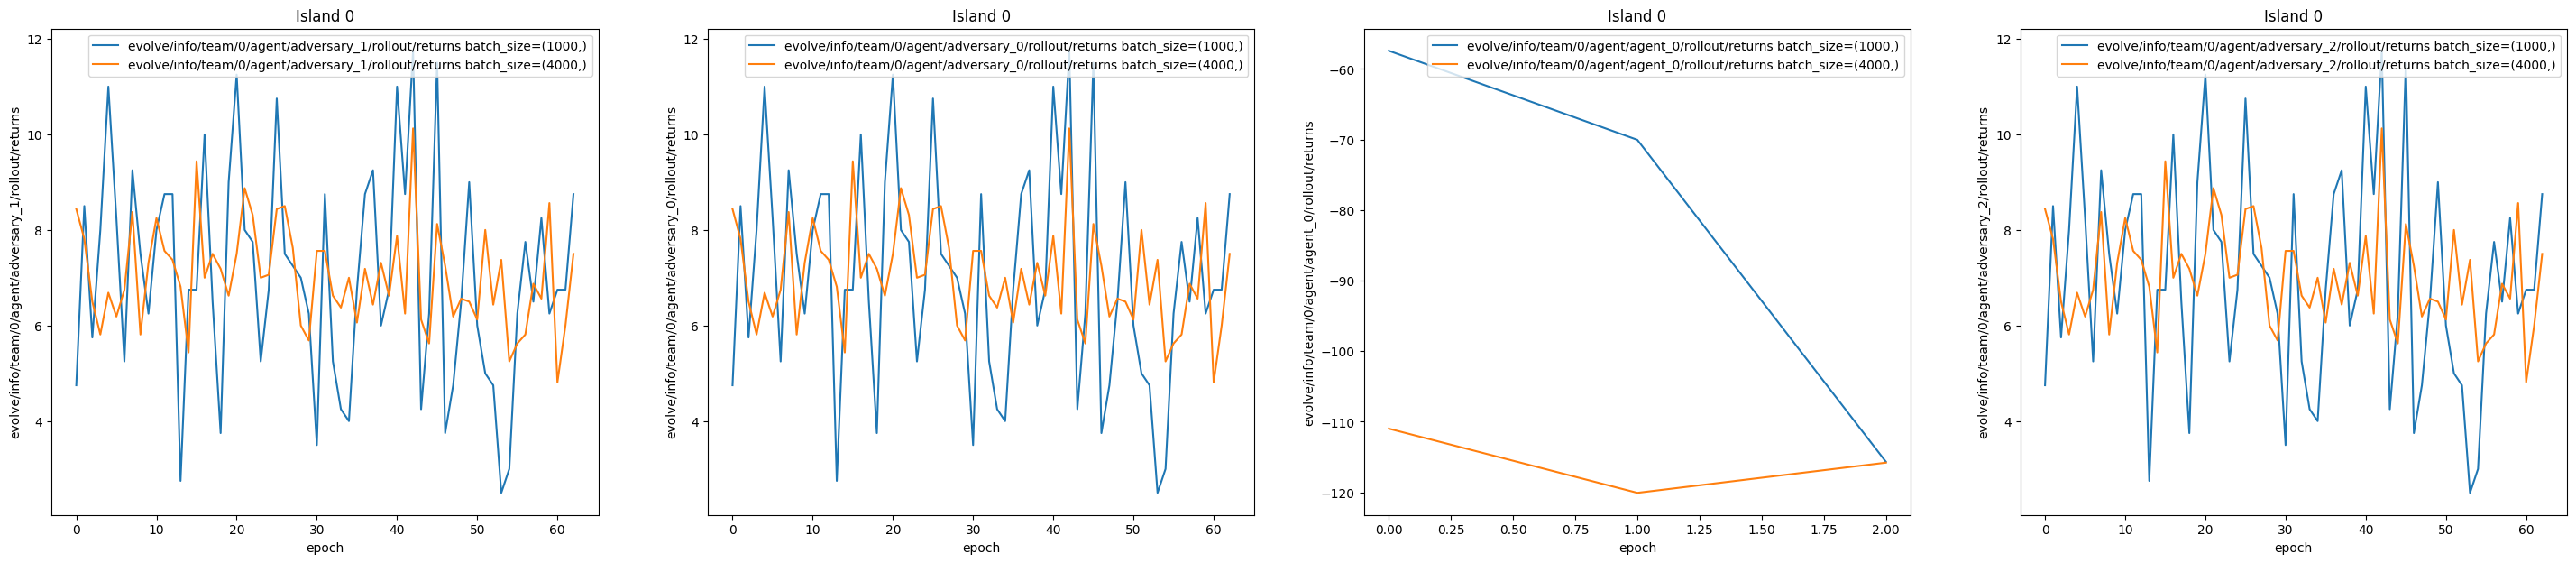

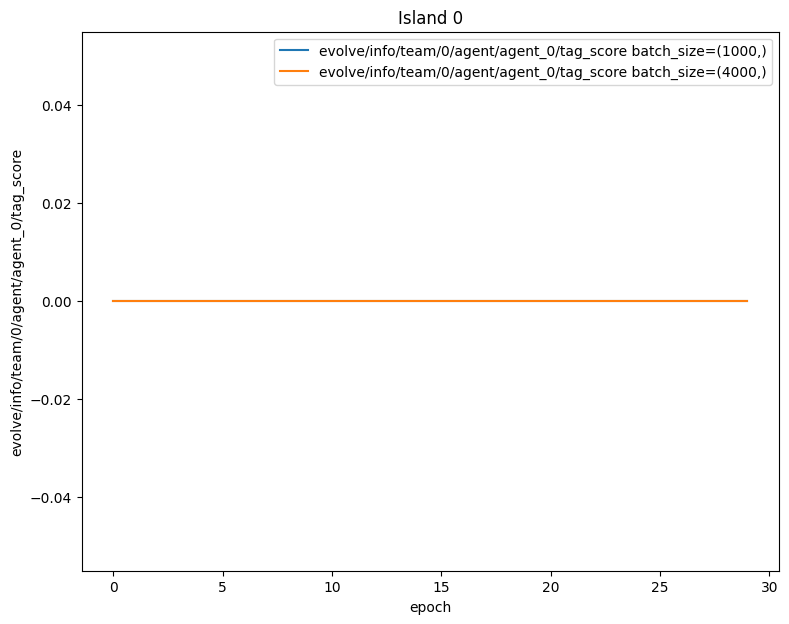

In [50]:
from collections import defaultdict
import yaml
from rich.console import Console
from rich.table import Table

console = Console()

def plot_col(f, ax, df, island_id, key, unique, concat_isl_iterations=True):
    # f, ax = plt.subplots(1, 1)
    x = []
    y = []
    y_err = []
    timesteps = 0
    epoch_interval = 1
    epoch_gates = []
    plot_gates = True

    for epoch, edf in df[df['island_id'] == island_id].sort_values(by='epoch').groupby('epoch'):
        epoch_y = []

        for name, row in edf.iterrows():
            data = row[key]

            if isinstance(data, float) or isinstance(data, np.float32) or isinstance(data, np.float16):
                # B+1 x 1
                epoch_y.append([data])
            else:
                # training loss gives (sgd_iters, island_iters)
                if len(data.shape) == 1:
                    epoch_y.append(data)
                else:
                    if concat_isl_iterations:
                        # (sgd_iters, island_iters)
                        data = data.T.flatten()
                    else:
                        data = data[:, -1]
                    # B+1 x T
                    epoch_y.append(data)
        
        # display(edf["epoch"])
        epoch_y = np.asarray(epoch_y) # + np.random.rand(len(epoch_y))
        # B x T
        timesteps += len(epoch_y[0])
        epoch_gates.append(
            {"epoch": epoch, "x": timesteps}
        )
        y.extend(epoch_y.mean(axis=0))
        y_err.extend(epoch_y.std(axis=0))

    x = np.arange(0, timesteps)
    y = np.asarray(y)
    y_err = np.asarray(y_err)

    ax.plot(x, y, label=unique)
    if "total_loss" in key:
        # ax.set_ylim([0, 150])

        if plot_gates:
            for epoch_gate in epoch_gates:
                ax.axvline(epoch_gate['x'], color='r', linestyle='--', alpha=0.5)
        
        ax.set_xlabel('timestep')
    else:
        ax.set_xlabel('epoch')


    if len(y_err):
        ax.fill_between(x, y-y_err, y+y_err, alpha=0.2)

    if True in np.isnan(y):
        ax.set_title(f"Island {int(island_id)} (NaN detected)", c='r')
    else:
        ax.set_title(f"Island {int(island_id)}")

    ax.set_ylabel(key)
    ax.legend()


def tabulate_col(df, key):
    # f, ax = plt.subplots(1, 1)
    x = []
    y = []
    y_err = []
    for epoch, edf in df[df['island_id'] == island_id].sort_values(by='epoch').groupby('epoch'):
        x.append(epoch)
        epoch_y = []

        for name, row in edf.iterrows():
            # training loss gives (sgd_iters, island_iters), but only care about last iter of both
            data = row[key][-1, -1]
            if isinstance(data, float) or isinstance(data, np.float32) or isinstance(data, np.float16):
                epoch_y.append(data)
            else:
                raise NotImplementedError()
                # # training loss gives all sgd_iters, but only care about last iter
                # if "loss" in key:
                #     data_mean = data[-1, :].mean()
                #     data_std = data[-1, :].std()
                # else:
                #     data_mean = data.mean()
                #     data_std = data.std()

        y.append(np.asarray(epoch_y).mean())
        y_err.append(np.asarray(epoch_y).std())

    y = np.asarray(y)
    y_err = np.asarray(y_err)

    return {
        "x": x,
        "y": y,
        "y_err": y_err
    }


def to_str(val) -> str:
    if isinstance(val, float):
        return f"{val:.3f}"

    return f"{val}"


def query_formatted_keys(search_df, search_term):
    count = 0
    keep_keys = []
    for key in search_df.keys():
        if search_term in key:
            if key not in keep_keys:
                count += 1
                keep_keys.append(key)

    island_ids = search_df['island_id'].unique()
    count *= len(island_ids)
    # print("total count", count)
    num_rows = max(1, count // max_plt_cols)
    leftover = count % max_plt_cols
    # print("num rows", num_rows)
    # print("leftover", leftover)
    num_cols = min(count, max_plt_cols + bool(leftover))
    # print("num cols", num_cols)
    print("tf keys:", keep_keys)

    return num_rows, num_cols, keep_keys


search_terms = [
    'fitness',
    "total_loss",
    "return",
    # "actor_loss",
    # "critic_loss",
    # "evolve/info/team/0/agent/agent_0/rollout/returns",
    "evolve/info/team/0/agent/agent_0/tag_score",
    # "minimum_ally_speed",
    # "minimum_adversary_speed",
    # "closest_ally_distance",
    # "closest_adversary_distance",
    # "closest_landmark_distance",
    # "boundary_penalty",
]
max_plt_cols = 7

term_to_f_data = defaultdict(dict)

# variable_keys = ["island_iterations", "archipelago_training_iterations", "island_iterations"]
variable_keys = ["uda_training_iterations", "num_sgd_iters", "island_iterations"]

# sort by some of the experiment variables. only consider island type
for (uda_training_iterations, num_sgd_iters, island_iterations), idf in ldf[ldf['island_type'] == 'island'].groupby(variable_keys):
# for (uda_training_iterations), idf in ldf[ldf['island_type'] == 'island'].groupby(variable_keys):
    # print(f"\t\tIsland iterations: {island_iterations}")
    # print(f"\t\tarchipelago_training_iterations: {archipelago_training_iterations}")
    print(f"\t\tisland_iterations: {island_iterations}")
    print(f"\t\tuda_training_iterations: {uda_training_iterations}")
    print(f"\t\num_sgd_iters: {num_sgd_iters}")
    name = f"isl-iter={island_iterations}_uda-iter={uda_training_iterations}_sgd-iters={num_sgd_iters}"
    # idf = ldf[
    #     (ldf['island_type'] == 'island') & \
    #     (ldf['island_iterations'] == 5) & \
    #     (ldf['archipelago_training_iterations'] == 0)
    # ]
    island_ids = idf['island_id'].unique()

    # # 1 epoch
    # for term in search_terms:
    #     print('=' * 25)
    #     print(f'\t{term}')
        
    #     num_rows, num_cols, keep_keys = query_formatted_keys(idf, term)

    #     col = 0
    #     row = 0
    #     counter = 0

    #     for ix, key in enumerate(keep_keys):
    #         for island_id, iidf in idf.groupby('island_id'):
                
    #             print(f"\tIsland ID {island_id}")
    #             table = Table(show_header=True, header_style="bold")
    #             table.add_column("batch_size")
    #             table.add_column("num_sgd_iters")
    #             table.add_column(f"...{key[-20:]}")
    #             table.add_column("std")

    #             # 1 epoch
    #             for (batch_size, sgd_iter), gdf in iidf.groupby(["batch_size", "num_sgd_iters"]):
    #                 result = tabulate_col(gdf, key)
    #                 table.add_row(
    #                     to_str(batch_size),
    #                     to_str(sgd_iter), 
    #                     to_str(float(result['y'][0])),
    #                     to_str(float(result['y_err'][0]) if len(result['y_err']) else "0.00")
    #                 )

    #             col = (col + 1) % num_cols
    #             if counter != 0 and col == 0:
    #                 row += 1
                
    #             counter += 1
        
    #             console.print(table)

    # epoch >1
    for term in search_terms:
        print('=' * 25)
        print(f'\t{term}')
        
        num_rows, num_cols, keep_keys = query_formatted_keys(idf, term)
        
        f, ax = plt.subplots(ncols=num_cols, nrows=num_rows)
        f.set_size_inches(num_cols * 9, num_rows * 7)

        col = 0
        row = 0
        counter = 0

        for ix, key in enumerate(keep_keys):
            for island_id, iidf in idf.groupby('island_id'):

                if num_rows > 1:
                    axes_obj = ax[row, col]
                elif num_cols > 1:
                    axes_obj = ax[col]
                else:
                    axes_obj = ax

                for (batch_size), gdf in iidf.groupby(["batch_size"]):
                # for (sigma), gdf in iidf.groupby(["sigma"]):
                    # plot_col(f, axes_obj, gdf, island_id, key, key + f" bs={batch_size} sgd={sgd_iter}")
                    plot_col(f, axes_obj, gdf, island_id, key, key + f" batch_size={batch_size}", concat_isl_iterations=False)

                col = (col + 1) % num_cols
                if counter != 0 and col == 0:
                    row += 1
                
                counter += 1

        f.savefig(figures_dir / f"allisland-fix-{name}-{term.replace('/', '.')}.pdf")

        # for ix, key in enumerate(keep_keys):
        #     for island_id, iidf in idf.groupby('island_id'):
        #         print(f"\tIsland ID {island_id}")
        #         table = Table(show_header=True, header_style="bold")
        #         table.add_column("epoch")  # change
        #         table.add_column("batch_size")
        #         table.add_column("num_sgd_iters")
        #         table.add_column(f"...{key[-15:]}")
        #         table.add_column("std")

        #         # # >1 epoch
                
        #         for (batch_size, sgd_iter, epoch), gdf in iidf.groupby(["batch_size", "num_sgd_iters", "epoch"]):
        #             result = tabulate_col(gdf, key)
        #             table.add_row(
        #                 to_str(epoch),
        #                 to_str(batch_size),
        #                 to_str(sgd_iter), 
        #                 to_str(float(result['y'][0])),
        #                 to_str(float(result['y_err'][0]) if len(result['y_err']) else "0.00")
        #             )

        #         col = (col + 1) % num_cols
        #         if counter != 0 and col == 0:
        #             row += 1
                
        #         counter += 1
        
                # console.print(table)



In [51]:
# for ix, run_id in enumerate(run_ids):
#     id_name = run_id.name
#     from_path = run_id / "search_data_out" / "df.pkl"
#     df = df_from_path(from_path)

    
#     island_ids = df['island_id'].unique()
#     col = 0
#     row = 0
#     counter = 0

#     for ix, key in enumerate(keep_keys):

#         for island_id, idf in df[df['island_id'] == 0].groupby('island_id'):

#             if num_rows > 1:
#                 axes_obj = ax[row, col]
#             else:
#                 axes_obj = ax[col]

#             plot_col(f, axes_obj, idf, island_id, key, key + f" {id_name}")
#             col = (col + 1) % num_cols
#             if counter != 0 and col == 0:
#                 row += 1
            
#             counter += 1

In [52]:
np.asarray([
    [3, 4, 5],
    [6, 7, 8]
]).flatten()

array([3, 4, 5, 6, 7, 8])